In [1]:
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def read_pickle_file(name):
    with open(name,'rb') as f:
        x = pickle.load(f)
    return x

In [3]:
train = read_pickle_file("data/Q2/train_feature_extracted.pickle")

In [4]:
test = read_pickle_file("data/Q2/test_feature_extracted.pickle")

In [5]:
X_train = train['X']
Y_train = train['Y']

In [6]:
X_test = test['X']
Y_test = test['Y']

In [8]:
clf = SVC(kernel='linear',probability=True,verbose=True)

In [9]:
clf.fit(X_train,Y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [10]:
pred = clf.predict(X_test)

In [11]:
accuracy_score(Y_test,pred)

0.5865

In [12]:
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred), range(2),range(2))


array([[552, 448],
       [379, 621]])

In [13]:
pred_p = clf.predict_proba(X_test)

/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


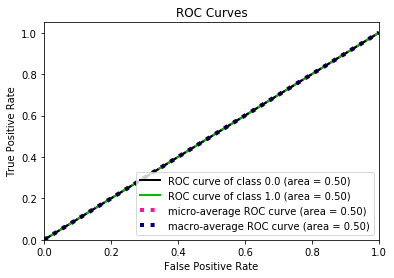

In [14]:
skplt.metrics.plot_roc_curve(Y_test, pred_p)